<a href="https://colab.research.google.com/github/udyanojha/Pokemon_LDA/blob/main/Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as ps
import matplotlib.pyplot as plt
import numpy as np

[]

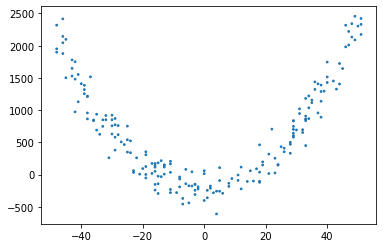

In [12]:
x = np.round(100*np.random.rand(200))
x = np.round(x-x.mean())
x.sort()
y = x**2 + np.random.normal(-200, 200, x.size)

plt.scatter(x, y, s = np.full(x.size, 3))
plt.plot()

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

x_train = x.reshape(x.size, 1)
y_train = y

tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(x_train, y_train)
y_predict1 = tree_reg1.predict(x_train)
y1_error = y_train - y_predict1

print("Error 1st iteration -->", mean_squared_error(y_predict1, y_train))

Error 1st iteration --> 153398.72275095634


In [15]:
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(x_train, y1_error)
y_predict2 = tree_reg2.predict(x_train)
y2_error = y1_error - y_predict2

print("Error 2st iteration -->", mean_squared_error(y_predict1 + y_predict2, y_train))

Error 2st iteration --> 74218.43080572822


In [16]:
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(x_train, y2_error)
y_predict3 = tree_reg3.predict(x_train)

print("Error 3rd iteration -->", mean_squared_error(y_predict1 + y_predict2 + y_predict3, y_train))

Error 3rd iteration --> 46958.57004238512


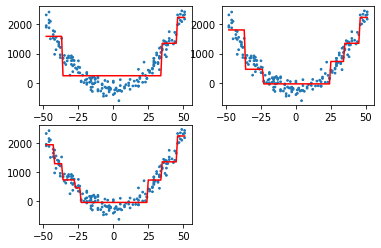

In [19]:
plt1 = plt.subplot(2,2,1)
plt2 = plt.subplot(2,2,2)
plt3 = plt.subplot(2,2,3)

plt1.scatter(x,y, s=np.ones(x.size)*3)
plt1.plot(x_train, y_predict1, 'r')

plt2.scatter(x,y, s=np.ones(x.size)*3)
plt2.plot(x_train, y_predict1 + y_predict2, 'r')

plt3.scatter(x,y, s=np.ones(x.size)*3)
plt3.plot(x_train, y_predict1 + y_predict2 + y_predict3, 'r')
plt.show()

In [21]:
# Early Stopping 

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

rand = np.random.permutation(np.arange(x.size))
rand_train = rand[:150]
rand_train.sort()
rand_test = rand[150:]
rand_test.sort()

x_train = x.reshape(x.size, 1)[rand_train]
y_train = y[rand_train]
x_test = x.reshape(x.size, 1)[rand_test]
y_test = y[rand_test]

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=2000)
gbrt.fit(x_train, y_train)

errors = [mean_squared_error(y_test, y_pred) for y_pred in gbrt.staged_predict(x_test)]
print(errors)

# plt.plot(errors)
# plt.show()

[649246.533304473, 552327.6961649045, 486295.4620281844, 420597.21450233704, 373287.0498891329, 332353.1561055852, 293984.7985135523, 258496.13293089962, 233034.07366886712, 212833.60496529765, 187141.1587684544, 168586.9289013509, 155235.07023991316, 143215.83818620973, 130814.64256713328, 118898.60724221628, 108836.50113910569, 101555.11514556925, 96358.95349273566, 88644.30245225996, 81995.89304299379, 78394.8558209352, 72430.90911505643, 67867.78469460802, 65320.371565565205, 63430.1589832207, 61311.12583969771, 58385.57301612371, 55646.0848540994, 52935.58054915504, 51904.098338579526, 50863.18760227286, 49299.66848993654, 48761.58231946354, 47947.60779994107, 46552.02529891042, 45480.081673968714, 44447.13063496803, 44034.49647791302, 43602.06277483313, 42979.99514046743, 42272.47101722904, 41926.19908187431, 41686.24663137043, 41485.23198022478, 41026.81066821944, 40866.343887661526, 40752.72090573471, 40483.11541553237, 40515.70014510546, 40189.71240101105, 40236.82912900269, 4

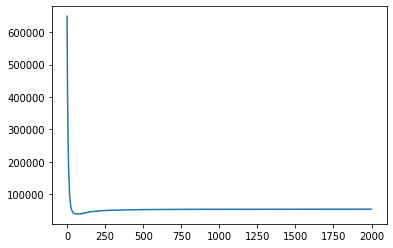

In [47]:
plt.plot(errors)

In [39]:
bst_n_estimators = np.argmin(errors)
gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators)
gbrt_best.fit(x_train, y_train)

y_pred = gbrt_best.predict(x_test)

print(mean_squared_error(y_test, y_pred))

46474.07205007284


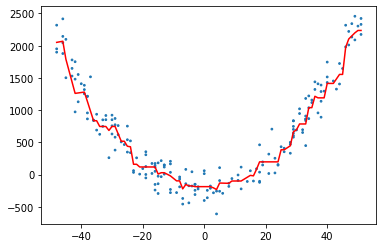

In [48]:
plt.scatter(x, y, s = np.ones(x.size)*3)
plt.plot(x_train, gbrt_best.predict(x_train), 'r')

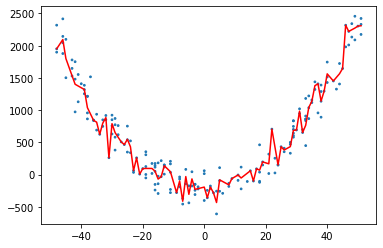

In [49]:
plt.scatter(x, y, s = np.ones(x.size)*3)
plt.plot(x_train, gbrt.predict(x_train), 'r')

In [50]:
# implement the early stopping

In [51]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)

min_val_error = float('inf')
error_going_up = 0

for n_estimators in range(1, 120):
  gbrt.n_estimators = n_estimators
  gbrt.fit(x_train, y_train)
  y_pred = gbrt.predict(x_test)
  val_error = mean_squared_error(y_test, y_pred)
  if val_error < min_val_error:
    min_val_error = val_error
    error_going_up = 0
  else:
    error_going_up += 1
    if error_going_up == 5:
      break #early stopping

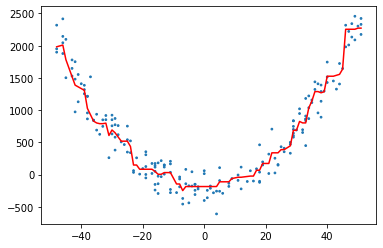

In [53]:
plt.scatter(x,y, s = np.ones(x.size)*3)
plt.plot(x_train , gbrt.predict(x_train), color='r')


In [54]:
import xgboost
from sklearn.metrics import mean_squared_error

xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(x_train, y_train, eval_set=[(x_test, y_test)], early_stopping_rounds=3)

y_pred = xgb_reg.predict(x_test)

print(mean_squared_error(y_pred, y_test))

[10:21:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1077.22
Will train until validation_0-rmse hasn't improved in 3 rounds.
[1]	validation_0-rmse:987.028
[2]	validation_0-rmse:905.259
[3]	validation_0-rmse:831.112
[4]	validation_0-rmse:764.521
[5]	validation_0-rmse:708.961
[6]	validation_0-rmse:654.182
[7]	validation_0-rmse:605.952
[8]	validation_0-rmse:564.836
[9]	validation_0-rmse:527.244
[10]	validation_0-rmse:492.297
[11]	validation_0-rmse:461.568
[12]	validation_0-rmse:432.126
[13]	validation_0-rmse:407.566
[14]	validation_0-rmse:383.871
[15]	validation_0-rmse:363.692
[16]	validation_0-rmse:346.953
[17]	validation_0-rmse:330.6
[18]	validation_0-rmse:316.723
[19]	validation_0-rmse:305.029
[20]	validation_0-rmse:293.378
[21]	validation_0-rmse:284.234
[22]	validation_0-rmse:275.176
[23]	validation_0-rmse:267.758
[24]	validation_0-rmse:260.456
[25]	validation_0-rmse:254.848
[26]	validation